<a href="https://colab.research.google.com/github/foundjem/ucops/blob/master/Foundjem_TweetAnalysis_Capstone_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## INSTALL DEPENDENCIES
!pip install transformers
!pip install ekphrasis
!pip install tweet-preprocessor
!pip install contractions
!pip install --upgrade gensim
!pip install torch
#!pip install matplotlib

In [ ]:
# Data analysis and visualization libs
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import type_of_target
## Python Shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# ml models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


#PyTorch LSTM
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#Tokenization for LSTM
from collections import Counter
from gensim.models import Word2Vec

#Transformers library for BERT
import transformers
from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup

from sklearn.metrics import classification_report, confusion_matrix

#Seed for reproducibility
import random

seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

# tensorflow
import tensorflow as tf
from tensorflow import keras
# dnn
from tensorflow.keras.layers import Dense,Flatten,Activation,Softmax
# RNN
from tensorflow.keras.layers import SimpleRNN,GRU,LSTM,Embedding,Bidirectional
# CNN
from tensorflow.keras.layers import Conv1D,MaxPooling1D
# optimization
from tensorflow.keras import optimizers
# pre-trained models
import transformers

## Metrics/Statistics
from scipy import stats
from sklearn import metrics
from sklearn.metrics import f1_score
from scipy.stats import entropy
import graphviz


##-- Language processing
# text preprocessing
import random
import string
import re
import requests

## Text contraction/expansion libraries
import contractions

from spacy.lang.en.examples import sentences
from sklearn.preprocessing import StandardScaler

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
# Create a reference variable for Class TweetTokenizer
tk = TweetTokenizer()

# nltk
import nltk
nltk.download
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))
from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer #,PorterStemmer
lemmma = WordNetLemmatizer()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')

## Tweeter text pre-processor
import preprocessor as tweetProcess

# Importing HTMLParser
import html

import preprocessor as tweetProcess
from ekphrasis.classes.segmenter import Segmenter
#segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")

import time

#set style for plots
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

## Exploratory Data Analysis and Pre-processing
- Step 1: Load data and visualize the content
- Step 2 : Data preprocessing: Clean tweet data and remove empty rows/lines in the tweet text data
- Step 3 :
- Step 4 :
- Step 5 : Tokenization, Stemming, and Lemmatization
- Step 6 : Vectorisation
- Step 7 :
- Step 8 :
- Step 9 :
- Step 10 :

In [ ]:
## Step 1: Loading the data

url2 = 'https://www.dropbox.com/s/xvpiy6qezeswg39/cyberbullying_tweets.csv?dl=1'
df = pd.read_csv(url2)
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


## Step 1: Visualizing the data

In [ ]:

print('Dataset size:',df.shape)
print("="*79)
print('\nColumns are:\n',df.columns)
print("="*79)
print('\nDescribe dataset:\n' ,df.describe())
print("="*79)
print('INFO:\n')
df.info()

Dataset size: (47692, 2)

Columns are:
 Index(['tweet_text', 'cyberbullying_type'], dtype='object')

Describe dataset:
                                                tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998
INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

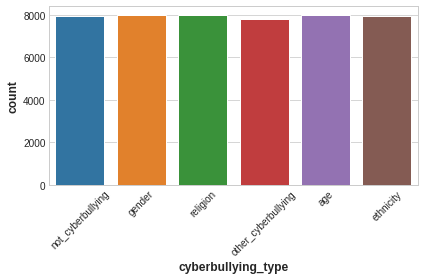

In [ ]:
sns.countplot(df["cyberbullying_type"])
plt.xticks(rotation=45)

In [ ]:
df["tweet_text"].duplicated().sum()

1675

In [ ]:
# ## Verify if dataframe has duplicate entries
print(f"There are {df.duplicated().sum()} duplicated rows")

#display(df.drop_duplicates())
#display(df[df.duplicated()])

ids = df["tweet_text"]
# # len(data[ids.isin(ids[ids.duplicated()])].sort_values("tweet_text"))

display(df[ids.isin(ids[ids.duplicated()])].sort_values("tweet_text"))

# #df[df.duplicated(['tweet_text'], keep=False)]
# out = pd.concat(g for _, g in df.groupby("tweet_text") if len(g) > 1)
# df = df.drop(out.index[:])
# df

There are 36 duplicated rows


,tweet_text,cyberbullying_type
10309,#Kat could Skank for Australia at the next Oly...,gender
29655,#Kat could Skank for Australia at the next Oly...,other_cyberbullying
14450,#MKR I really hope they get out-sassed,gender
3544,#MKR I really hope they get out-sassed,not_cyberbullying
8126,#MKR anyone can cook from a can girls.,gender
...,...,...
28985,~10% of the posts I've read on Facebook today ...,other_cyberbullying
28212,“@BurrawongGaian: @Le_bon_vivant_ @ConjurupFoo...,other_cyberbullying
7660,“@BurrawongGaian: @Le_bon_vivant_ @ConjurupFoo...,not_cyberbullying
6531,“The Fat Girl Behind the Fitness App” by @naom...,not_cyberbullying


In [ ]:
display(df.drop_duplicates())

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
df.shape

(47692, 2)

In [ ]:
# sns.countplot(df["cyberbullying_type"])
# plt.xticks(rotation=45)
df.isna().values.any()

False

Step 2 :  Data preprocessing. Expanding contracted words and apostrophe for efficient processing

In [ ]:
# Some text in the tweet are in short form, wich we want to extract its meaning: Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
## Dictionary of commonly used words on tweeter
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"bro ": "brother",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gotta": "have got to",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"isis": "Islamic State",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r ": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"Bro.": "brother",
"bro": "brother",
"sis.": "sister",
"sis": "sister",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

## Data Cleaning and pre-processing

In [ ]:
## Define a class to clean and pre-process the textual data.
## Tweeter/social media data comes with lots of noisiness
## and emojies/text that needs proper preprocessing before we can make sense of it.

class Text_Processing:
    def __init__(self,sentence,drop_stopword=True):
        '''Class constructor'''
        self.sentence=sentence
        self.drop_stopword=drop_stopword

    def count_words(self,sentence):
        '''Count number of words per rows entry in the dataframe'''
        words=[word for word in sentence.split(" ")]
        return len(words)

    def lower_case(self,text):
        '''Convert tweet text to lower case before processing '''
        return text.lower()

    def stop_words(self,sentence):
        '''Removing english stop words, which may only increase noise in the data analysis process'''
        if self.drop_stopword == True:
            additional  = ['rt','rts','retweet']
            stop_words=set().union(stopwords.words("english"),additional)
            words=[word for word in sentence.split(" ") if word not in stop_words]
            return " ".join(words)
        else:
            return sentence

    def remove_punct(self,sentence):
        '''Removing punctuation signs/marks, since theya re not necessary for analysis'''
        text  = "".join([char for char in self.sentence if char not in string.punctuation])
        text = re.sub('[0-9]+', ' ', text)
        return self.lower_case(text)


    # def spell_correction(self,sentence):
    #     '''Correcting mispelled word before processing to increase the context.
    #      This function takes close to two hours of execution time to complet on
    #      this data[tweet_text]. So, I omitted it on this project.'''
    #     return spell(sentence)

    def clean(self, dataframe):
        '''To clean the tweet text, we first start by removing URLs, hashtags (#),
         USERS (@), Emojis, retweets, numbers, etcs.
         This function processess a dataframe object passes globally as -- sentence (df[tweet_text])'''

        tweetProcess.set_options(tweetProcess.OPT.MENTION, tweetProcess.OPT.HASHTAG,
                        tweetProcess.OPT.EMOJI, tweetProcess.OPT.SMILEY,
                        tweetProcess.OPT.URL, tweetProcess.OPT.RESERVED,
                        tweetProcess.OPT.NUMBER)

        if 'cleaned_tweet' not in dataframe.columns:
          for i,v in enumerate(dataframe[self.sentence]):
            dataframe.loc[i,'cleaned_tweet'] = tweetProcess.clean(v)
        return dataframe

    def remove_empty_rows(self, dataframe):
        ''' Remove empty dataframe/lines entries by first filling empty lines with NA,
            then delete those rows'''
        if not dataframe.empty:
           dataframe.replace(r'^\s*$', np.nan, regex=True, inplace=True)
           return dataframe.dropna(inplace=True)

    def remove_duplicates(self, dataframe):
        '''data is the main dataframe = df, and the field of interest is df['tweet_text]
        ''' #df.drop_duplicates("tweet_text", inplace=True)
        if not dataframe.empty:
           return dataframe.drop_duplicates(self.sentence, inplace=True)

    def remove_multi_label_assignment(self, dataframe):
        '''Remove rows that are assigned to more than one class and this becomes ambigious
        '''
        out = pd.concat(g for _, g in dataframe.groupby("cleaned_tweet") if len(g) > 1)
        return dataframe.drop(out.index[:])

    def expand_word(self, sentence):
        '''Function to expand english word contrations such as I'ii -> I will, etc
        creating an empty list'''
        expanded_words = []
        for word in self.sentence.split():
          # using contractions.fix to expand the shortened words
          expanded_words.append(contractions.fix(word))
        expanded_text = ' '.join(expanded_words)
        return expanded_text

    def lookup_dict(self, sentence, dictionary):
        '''Converting text  to complet/full englsih words by reading
           the defined python dictionaries of words to expand short tweet words and contracted words.'''
        for word in self.sentence.split():
            if word.lower() in dictionary:
                if word.lower() in self.sentence.split():
                    sentence = self.sentence.replace(word, dictionary[word.lower()])
        return self.expand_word(sentence)

    def tweet_len_analysis(self, dataframe):
        dataframe = dataframe[(dataframe[self.sentence] >= 5) & (dataframe[self.sentence] < 100)]
        return dataframe

    def tokenize_text(self, dataframe):
        '''Apply tokenization to the pre-process text from the tweeter tokenizer library
        '''
        dataframe['tweet_token'] = dataframe[self.sentence].apply(lambda x: tk.tokenize(x))
        return dataframe

    def stemming_text(self, dataframe):
        '''Stemming a tokenized text
        '''
        dataframe['tweet_stemmed'] = dataframe[self.sentence].apply(lambda x: ' '.join([stemmer.stem(i) for i in x]))
        #apply(lambda text:Text_Processing(text).stemming_text(text))
        return dataframe #self.sentence.apply(lambda x: ' '.join([stemmer.stem(i) for i in x]))

    def lemmat_text(self, dataframe):
        '''Finally lemmentation (lemmma)
        '''
        dataframe['tweet_lemmatized'] = dataframe[self.sentence].apply(lambda x: ' '.join([lemmma.lemmatize(i) for i in x]))
        return dataframe


    def filtered_data(self):
        '''Select and save only the features of interest in the data processing step.'''
        self.sentence = self.sentence[['cleaned_tweet', 'tweet_token',	'tweet_stemmed',	'tweet_lemmatized', 'len_words',	'cyberbullying_type']]
        return self.sentence.applymap(lambda s: s.lower() if type(s) == str else s)

    def conf_matrix(self, y, y_pred, title,labels):
        fig, ax =plt.subplots(figsize=(7.5,7.5))
        ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="GnBu",fmt='g', cbar=True, annot_kws={"size":30})
        #plt.title(title, fontsize=25)
        ax.xaxis.set_ticklabels(labels, fontsize=16)
        ax.xaxis.set_label_position('top')
        ax.yaxis.set_ticklabels(labels, fontsize=14.5)
        ax.set_ylabel('Actual value', fontsize=25)
        ax.set_xlabel('Predicted value', fontsize=25)
        plt.show()

    def Tokenize(self, column, seq_len):
        ##Create vocabulary of words from column
        corpus = [word for text in self.sentence[column] for word in text.split()]
        count_words = Counter(corpus)
        sorted_words = count_words.most_common()
        vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

        ##Tokenize the columns text using the vocabulary
        text_int = []
        for text in self.sentence[column]:
            r = [vocab_to_int[word] for word in text.split()]
            text_int.append(r)
        ##Add padding to tokens
        features = np.zeros((len(text_int), seq_len), dtype = int)
        for i, review in enumerate(text_int):
            if len(review) <= seq_len:
                zeros = list(np.zeros(seq_len - len(review)))
                new = zeros + review
            else:
                new = review[: seq_len]
            features[i, :] = np.array(new)

        return sorted_words, features


In [ ]:
 ## 1. Clean the data by removing all Tweeter keywords, Hashtags, URL, Emojis, etc.
df = Text_Processing('tweet_text').clean(df)

In [ ]:
## 2.  Remove duplicates
Text_Processing('tweet_text').remove_duplicates(df)

In [ ]:
df.isnull().values.any()

False

In [ ]:
## Step 4: Delete tweet_text row with empty tweet text
Text_Processing('tweet_text').remove_empty_rows(df)
df
# df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
# df.dropna(inplace=True)

,tweet_text,cyberbullying_type,cleaned_tweet
0,"In other words #katandandre, your food was cra...",not_cyberbullying,"In other words , your food was crapilicious!"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,Why is so white?
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,a classy whore? Or more red velvet cupcakes?
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,"meh. thanks for the heads up, but not too conc..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,This is an ISIS account pretending to be a Kur...
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,"Black ppl aren't expected to do anything, depe..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,Turner did not withhold his disappointment. Tu...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,I swear to God. This dumb nigger bitch. I have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,Yea fuck you RT : IF YOURE A NIGGER FUCKING UN...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

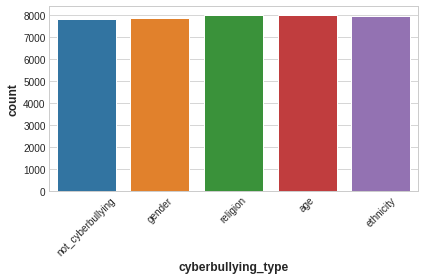

In [ ]:
df = df[df["cyberbullying_type"]!="other_cyberbullying"]

sns.countplot(df["cyberbullying_type"])
plt.xticks(rotation=45)

In [ ]:
### 2. Remove punctuations
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x:Text_Processing(x).remove_punct(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda text:Text_Processing(text).lookup_dict(text,apostrophe_dict))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda text:Text_Processing(text).lookup_dict(text,short_word_dict))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda text:Text_Processing(text).expand_word(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda text:Text_Processing(text).remove_punct(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda text:Text_Processing(text).stop_words(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## I noticed that one text was assigned to multiple labels in the cyberbullyinh type.
## Indeed, most of the duplicated text goes to other cyberbullying category, which is worth removing
#df = Text_Processing(df['cleaned_tweet']).remove_multi_label_assignment(df)

In [ ]:
df["len_words"] = df['cleaned_tweet'].apply(lambda text:Text_Processing(text).count_words(text))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
print(f'Duplicates after clean: {df["tweet_text"].duplicated().sum()}')
print(f"Dropping ...")

df.drop_duplicates("tweet_text", inplace=True)

Duplicates after clean: 0
Dropping ...


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

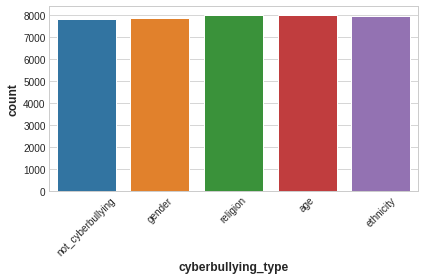

In [ ]:

sns.countplot(df["cyberbullying_type"])
plt.xticks(rotation=45)

In [ ]:
y_labels = ["age","ethnicity","gender","not bullying","religion"]

In [ ]:
## Verify if all duplicate entries are removed
print(f"There are {df.duplicated().sum()} duplicated rows")
ids = df["tweet_text"]
display(df[ids.isin(ids[ids.duplicated()])].sort_values("tweet_text"))

There are 0 duplicated rows


,tweet_text,cyberbullying_type,cleaned_tweet,len_words


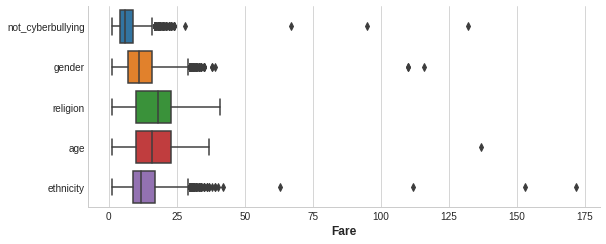

In [ ]:
## Visualizing data median on cyberbullying disribution
## sns.catplot(data=df, x="cyberbullying_type", y="len_words", kind="box", orient="h")

g = sns.catplot(
    data=df,
    y="cyberbullying_type", x="len_words",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=3.5, aspect=2.5,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

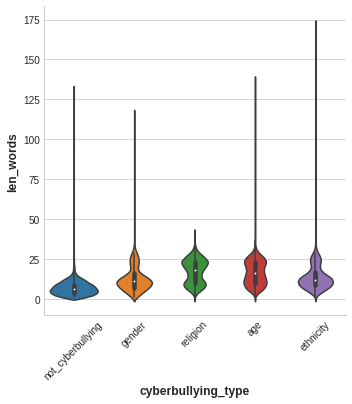

In [ ]:
sns.catplot(
    data=df,
    x="cyberbullying_type", y="len_words",  kind="violin",
)
plt.xticks(rotation=45)

<Figure size 1152x360 with 0 Axes>

Text(0.5, 1.0, 'Count of tweets with less than 10 words')

([], <a list of 0 Text major ticklabel objects>)

Text(0, 0.5, 'count')

Text(0.5, 0, '')

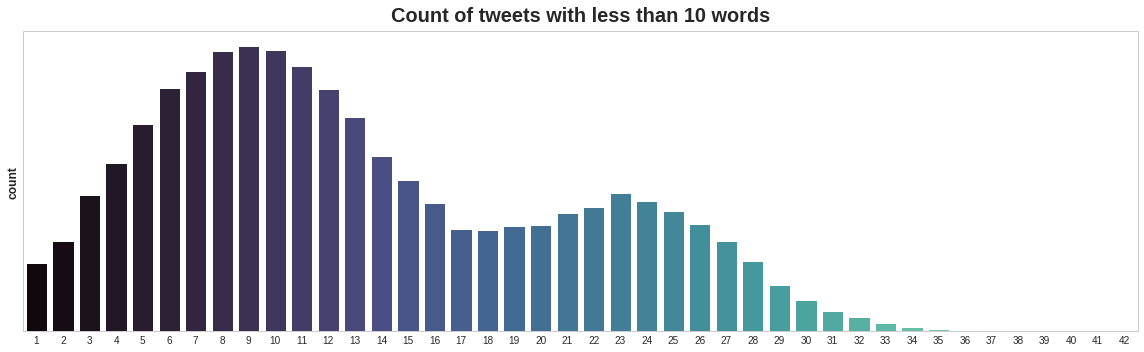

In [ ]:
## Based on above boxplot, we can remove outliers text above 50 count

plt.figure(figsize=(16,5))
ax = sns.countplot(x='len_words', data=df[df['len_words']<50], palette='mako')
plt.title('Count of tweets with less than 10 words', fontsize=20)
plt.yticks([])
plt.ylabel('count')
plt.xlabel('')
plt.show()


In [ ]:
df.sort_values(by=['len_words'], ascending=False)

,tweet_text,cyberbullying_type,cleaned_tweet,len_words
44035,You so black and white trying to live like a n...,ethnicity,black white trying live like nigger pahahahaha...,172
45165,"@hermdiggz: “@tayyoung_: FUCK OBAMA, dumb ass ...",ethnicity,fuck obama dumb ass nigger bitch ltthis whore ...,153
33724,"... I don't feel guilty for killing him, I jus...",age,feel guilty killing feel guilty enjoyed tormen...,137
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,researchers push import top antibullying progr...,132
10922,don't make rape jokes!!! don't make gay jokes!...,gender,make rape jokes make gay jokes oh fat jokes ok...,116
...,...,...,...,...
14902,Thanks @ameliagree…,gender,thanks,1
5413,Does this shock you?,not_cyberbullying,shock,1
7787,@holinka remember when... http://t.co/WE8hmQbQWn,not_cyberbullying,remember,1
3987,@Bruciebabe @ericcartmanfat @andyblueskyz @che...,not_cyberbullying,,1


In [ ]:
#df['tweet_text'][24960]

In [ ]:
##df = df[df['len_words'] < 50]
df = Text_Processing('len_words').tweet_len_analysis(df)
df

,tweet_text,cyberbullying_type,cleaned_tweet,len_words
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...,8
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...,8
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,11
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,itu sekolah ya bukan tempat bully ga jauh kaya...,10
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...,21
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,29
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,13
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck nigger fucking unfollow fucking dumb ...,8


In [ ]:
maxTweetLen = np.max(df['len_words'])
maxTweetLen

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

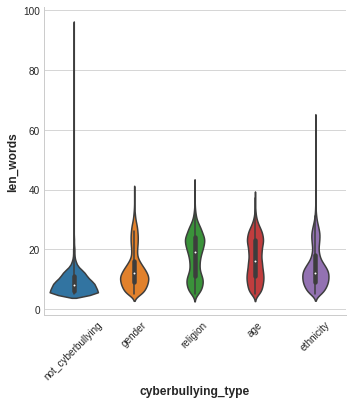

In [ ]:
sns.catplot(
    data=df,
    x="cyberbullying_type", y="len_words",  kind="violin",
)
plt.xticks(rotation=45)

In [ ]:

df.sort_values(by=['len_words'], ascending=False)

,tweet_text,cyberbullying_type,cleaned_tweet,len_words
3030,He embellished the afternoon with moustachioed...,not_cyberbullying,embellished afternoon moustachioed feints amp ...,95
4846,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying,recuerdas como nosotras tambin eramos victimas...,67
44294,@JasmineLovvee If He Dont Want You Well Fuck H...,ethnicity,want well fuck worth tears never sweat dumb ni...,63
41749,@seijohgorl hoy mami keito AAAA okay so um ika...,ethnicity,hoy mami keito aaaa okay um ikaw talaga one fi...,42
21241,And yet God was able to meet their needs using...,religion,yet god able meet needs using radical everyday...,41
...,...,...,...,...
45789,@2DirtySprite you dumb fuck nigger my Cday isn...,ethnicity,dumb fuck nigger cday tomorrow,5
7839,@g56yu Was he wrongly accused himself? Didn't...,not_cyberbullying,wrongly accused know back story,5
7834,@DomWorldPeace: Baseball season for the win. #...,not_cyberbullying,baseball season win love started,5
32786,Four important high school albums. https://twi...,age,four important high school albums,5


### Future work: I will like to handle imballanced dataset on other_cyberbullying category

## Embeding and Encoding


In [ ]:
df['bullying'] = df['cyberbullying_type'].replace({'age':0,'ethnicity':1,'gender':2,'not_cyberbullying':3,'religion':4})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
np.unique(df['cyberbullying_type'])

array(['age', 'ethnicity', 'gender', 'not_cyberbullying', 'religion'],
      dtype=object)

In [ ]:
df.head(3)

,tweet_text,cyberbullying_type,cleaned_tweet,len_words,bullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,5,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...,8,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...,8,3


## Train - Valid - Test set split

In [ ]:
X = df['cleaned_tweet']
y = df['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed_value)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=seed_value)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([['age', 4631],
       ['ethnicity', 4527],
       ['gender', 4224],
       ['not_cyberbullying', 3188],
       ['religion', 4640]], dtype=object)

In [ ]:
randOverSam = RandomOverSampler()
X_train, y_train = randOverSam.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_xy_ROS = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['cleaned_tweet', 'bullying']);

In [ ]:

X_train = train_xy_ROS['cleaned_tweet'].values
y_train = train_xy_ROS['bullying'].values

In [ ]:
## Oversampling technique to prevent overfitting
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([['age', 4640],
       ['ethnicity', 4640],
       ['gender', 4640],
       ['not_cyberbullying', 4640],
       ['religion', 4640]], dtype=object)

In [ ]:
## Multinominal bayesian: using vectorization to convert text to numbers/floats
vec = CountVectorizer()
X_train_vec =  vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [ ]:
## Next, we wznt to find the similarities among the text
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_vec)
X_train_txfm = tf_transformer.transform(X_train_vec)
X_test_txfm = tf_transformer.transform(X_test_vec)

In [ ]:
nb_vec = MultinomialNB()
nb_vec.fit(X_train_txfm, y_train)

MultinomialNB()

In [ ]:
nb_predict = nb_vec.predict(X_test_txfm)

In [ ]:
print('Naive Bayes multinominal classifier:\n',classification_report(y_test, nb_predict, target_names=y_labels))


Naive Bayes multinominal classifier:
               precision    recall  f1-score   support

         age       0.79      0.98      0.88      2335
   ethnicity       0.92      0.92      0.92      2283
      gender       0.89      0.85      0.87      2129
not bullying       0.84      0.45      0.59      1608
    religion       0.86      0.96      0.91      2340

    accuracy                           0.86     10695
   macro avg       0.86      0.83      0.83     10695
weighted avg       0.86      0.86      0.85     10695



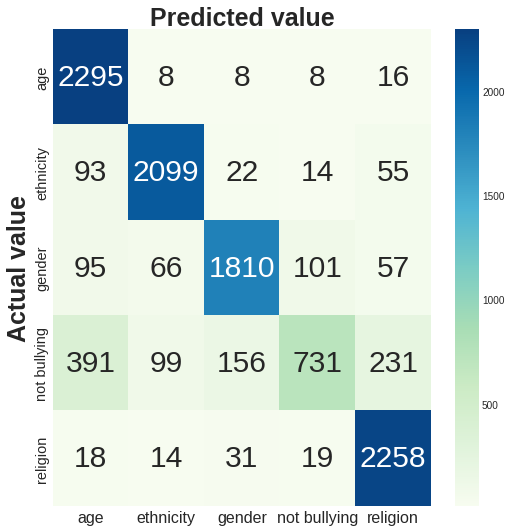

In [ ]:
Text_Processing('cleaned_tweet').conf_matrix(y_test,nb_predict,'Naive Bayes', y_labels)

In [ ]:
vocabulary, tokenized_column = Text_Processing(df).Tokenize("cleaned_tweet", maxTweetLen)

In [ ]:
#df["cleaned_tweet"].iloc[111]

In [ ]:
#tokenized_column[111]

In [ ]:
keys = []
values = []
for key, value in vocabulary[:20]:
    keys.append(key)
    values.append(value)

In [ ]:
# import matplotlib
# print('matplotlib: {}'.format(matplotlib.__version__))

<Figure size 1080x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top 20 most common words')

Text(0, 0.5, 'Words count')

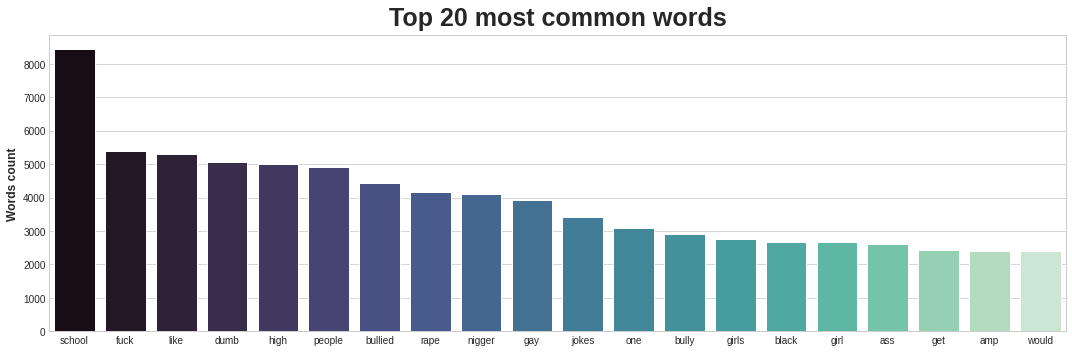

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(keys, values, palette='mako')
plt.title('Top 20 most common words', size=25)
#ax.bar_label(ax.containers[0])
plt.ylabel("Words count")
plt.show()

In [ ]:
Word2vec_train_data = list(map(lambda x: x.split(), X_train))
EMBEDDING_DIM = 200
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)
VOCAB_SIZE = len(vocabulary) + 1 #+1 for the padding

In [ ]:
print(f"Vocabulary size: {len(vocabulary) + 1}")

Vocabulary size: 40725


In [ ]:
#define empty embedding matrix
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

#fill the embedding matrix with the pre trained values from word2vec
#    corresponding to word (string), token (number associated to the word)
for word, token in vocabulary:
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (40725, 200)


In [ ]:

X = tokenized_column
y = df['bullying'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed_value)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, stratify=y_train, random_state=seed_value)


In [ ]:
(unique, counts) = np.unique(X_train, return_counts=True)
np.asarray((unique, counts)).T

array([[      0, 1706799],
       [      1,    5034],
       [      2,    3208],
       ...,
       [  40720,       1],
       [  40721,       1],
       [  40722,       1]])

In [ ]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(X_train).reshape(-1, 1), np.array(y_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['cleaned_tweet', 'bullying']);

In [ ]:
assert(len(X_train) == len(y_train))

In [ ]:
X_train = train_os['cleaned_tweet'].values
y_train = train_os['bullying'].values

(35649, 95)

In [ ]:
df

,tweet_text,cyberbullying_type,cleaned_tweet,len_words,bullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,5,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...,8,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...,8,3
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,11,3
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying,itu sekolah ya bukan tempat bully ga jauh kaya...,10,3
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...,21,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,29,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,13,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck nigger fucking unfollow fucking dumb ...,8,1


### STEP 5: Tokenization, Stemming, and Lemmatization

In [ ]:
## Creating token for the clean tweets
Text_Processing('cleaned_tweet').tokenize_text(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,tweet_text,cyberbullying_type,cleaned_tweet,len_words,tweet_token
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words food crapilicious,3,"[words, food, crapilicious]"
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,white,1,[white]
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,5,"[classy, whore, red, velvet, cupcakes]"
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks heads concerned another angry dude ...,8,"[meh, thanks, heads, concerned, another, angry..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...,8,"[isis, account, pretending, kurdish, account, ..."
...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...,21,"[black, people, expected, anything, depended, ..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,29,"[turner, withhold, disappointment, turner, cal..."
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,13,"[swear, god, dumb, nigger, bitch, got, bleach,..."
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck nigger fucking unfollow fucking dumb ...,8,"[yea, fuck, nigger, fucking, unfollow, fucking..."


In [ ]:
## Word tokenization
df = Text_Processing('tweet_token').stemming_text(df)

In [ ]:
## Word lemmatization
df = Text_Processing('tweet_token').lemmat_text(df)

In [ ]:
## After filtering the dataset, we can select only the columns we will need to analyze with our model
df = Text_Processing(df).filtered_data()

In [ ]:
df

,tweet_token,tweet_stemmed,tweet_lemmatized,len_words,cyberbullying_type
0,"[words, food, crapilicious]",word food crapilici,word food crapilicious,3,not_cyberbullying
1,[white],white,white,1,not_cyberbullying
2,"[classy, whore, red, velvet, cupcakes]",classi whore red velvet cupcak,classy whore red velvet cupcake,5,not_cyberbullying
3,"[meh, thanks, heads, concerned, another, angry...",meh thank head concern anoth angri dude twitter,meh thanks head concerned another angry dude t...,8,not_cyberbullying
4,"[isis, account, pretending, kurdish, account, ...",isi account pretend kurdish account like islam...,isi account pretending kurdish account like is...,8,not_cyberbullying
...,...,...,...,...,...
47687,"[black, people, expected, anything, depended, ...",black peopl expect anyth depend anyth yet free...,black people expected anything depended anythi...,21,ethnicity
47688,"[turner, withhold, disappointment, turner, cal...",turner withhold disappoint turner call court a...,turner withhold disappointment turner called c...,29,ethnicity
47689,"[swear, god, dumb, nigger, bitch, got, bleach,...",swear god dumb nigger bitch got bleach hair re...,swear god dumb nigger bitch got bleach hair re...,13,ethnicity
47690,"[yea, fuck, nigger, fucking, unfollow, fucking...",yea fuck nigger fuck unfollow fuck dumb nigger,yea fuck nigger fucking unfollow fucking dumb ...,8,ethnicity


## Word cloud with stemming and lemmatation

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

Text(0.5, 1.0, 'Most Common words in column Tweet Stemmed')

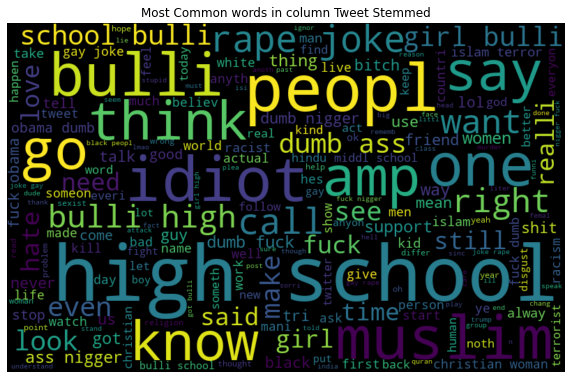

In [ ]:
#visualizing all the words in stemmer using the wordcloud plot.
all_words = ' '.join([text for text in df['tweet_stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

<Figure size 720x504 with 0 Axes>

(-0.5, 799.5, 499.5, -0.5)

Text(0.5, 1.0, 'Most Common words in column Tweet lemmatized')

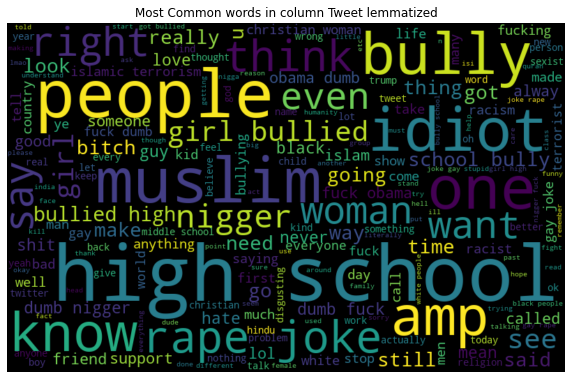

In [ ]:
#visualizing all the words in column "tweet_stemmed" in our data using the wordcloud plot.
all_words = ' '.join([text for text in df['tweet_lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet lemmatized")
plt.show()

In [ ]:
# sns.countplot(df["cyberbullying_type"])
# plt.xticks(rotation=45)

In [ ]:
## Verify label type to infor on which model to use
type_of_target(df['cyberbullying_type'])

'multiclass'

In [ ]:
## extract unique labels to know hiw many classes are needed
np.unique(df['cyberbullying_type'])

array(['age', 'ethnicity', 'gender', 'not_cyberbullying',
       'other_cyberbullying', 'religion'], dtype=object)

In [ ]:
# put labels in dictionay according to number of class
ylabel = {
    0: "age",
    1: "ethnicity",
    2: "gender",
    3: "not_cyberbullying",
    4: "other_cyberbullying",
    5: "religion"
}

In [ ]:
# tweet_stemmed = df['tweet_stemmed'].to_numpy()
# bullying_type = df['cyberbullying_type'].to_numpy()
# assert (len(tweet_stemmed) == len(bullying_type))
# len(tweet_stemmed)
# df.cyberbullying_type

X = df['tweet_lemmatized'].to_numpy()
y = df['cyberbullying_type'].to_numpy()
assert (len(X) == len(y))
len(X)

43589

In [ ]:
df.head(3)

,tweet_token,tweet_stemmed,tweet_lemmatized,len_words,cyberbullying_type
0,"[words, food, crapilicious]",word food crapilici,word food crapilicious,3,not_cyberbullying
1,[white],white,white,1,not_cyberbullying
2,"[classy, whore, red, velvet, cupcakes]",classi whore red velvet cupcak,classy whore red velvet cupcake,5,not_cyberbullying


#  Text Embedding

### STEP 6: Vectorisation

In [ ]:

df['label'] = df['cyberbullying_type'].replace({'age':0,'ethnicity':1,'gender':2,'not_cyberbullying':3,'other_cyberbullying':4, 'religion':5})


In [ ]:
from pandas.core.common import random_state
def split_data(X, y, train_size=0.6, val_size=0.2):

    # Begin by determining the number of samples you will need in
    # each type of dataset (70% training, 15% validation, and 15% test examples)

    ## total = training (70%) + validation (15%) + testing (15%)
    total_data = X.shape[0]                            # total data (100%)
    train_size = int(total_data * train_size)          # 70%  of total data
    val_size   = int(total_data * val_size)            # 15% of total data
    test_size  = total_data - (train_size + val_size)  # 15% of total data


    # Split total to extract the val set (15%) and keeping 85%
    train_tX, val_X, train_ty, val_y = train_test_split(X,
                                                y,
                                                test_size=val_size,
                                                stratify=y,
                                                random_state=seed_value
                                                )

    # From the remaining 85%, we split train_tX into 15% test and 70% train sets
    train_X, test_X, train_y, test_y = train_test_split(train_tX,
                                              train_ty,
                                              test_size=test_size,
                                              stratify=train_ty,
                                              random_state=seed_value
                                              )

    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }

In [ ]:
def load_data(tweets, labels):
  lines = []
  y = []
  lines.extend([l.strip() for l in tweets])
  y.extend([l.strip() for l in labels])
  vec = CountVectorizer(input='content', max_features=10000) #input='content' , max_features=10000 , stop_words='english'
  vec.fit(lines)
  tweet_matrix = vec.transform(lines).toarray()

  ## convert strings into integer value in a multi-class labels
  ybar = [key for key,value in ylabel.items() for v in labels if value == v]

  return split_data(tweet_matrix, ybar), vec.get_feature_names_out()

In [ ]:
ls, fn = load_data(X, y)

In [ ]:
len( ls['test'][0] )

X_train, y_train = ls['train'][0], ls['train'][1]
X_test,  y_test  = ls['test'][0], ls['test'][1]
X_valid, y_valid = ls['val'][0], ls['val'][1]

8719

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed_value)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=seed_value)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([['age', 5649],
       ['ethnicity', 5464],
       ['gender', 5278],
       ['not_cyberbullying', 5265],
       ['other_cyberbullying', 4038],
       ['religion', 5689]], dtype=object)

In [ ]:
inputs_train = ls['train'][0]
inputs_valid = ls['val'][0]
inputs_test  = ls['test'][0]

target_train = np.array(ls['train'][1])
target_valid = np.array(ls['val'][1])
target_test  = np.array(ls['test'][1])

train_num = len(ls['train'][0])
val_num   = len(ls['val'][0])
test_num  = len(ls['test'][0])

num_classes = len(np.unique(bullying_type))

input_shape = inputs_train.shape[1]
learning_rate = 0.0001 ##0.001 (1e-3), then 0.0001 (1e-4)
EPOCHS = 5

## Balancing the training distribution by oversampling

In [ ]:
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(np.array(inputs_train).reshape(-1, 1), np.array(target_train).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in X_train], y_train)), columns = ['text_clean', 'sentiment']);

26153

In [ ]:
''' Binarize labels in a one-vs-all fashion. Extending sklearn algorithms to a
 multi-class classification using a one-vs-all scheme.'''
from sklearn.preprocessing import LabelBinarizer
y = np.array(df['cyberbullying_type'])
y_dense = LabelBinarizer().fit_transform(y)
print(y_dense)


' Binarize labels in a one-vs-all fashion. Extending sklearn algorithms to a\n multi-class classification using a one-vs-all scheme.'

[[0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 ...
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]]


In [ ]:
from scipy import sparse
y_sparse = sparse.csr_matrix(y_dense)
print(y_sparse)

In [ ]:
# # Importing library
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer

CountVectorizer(max_features=10000)

In [ ]:
## bag-of-words feature matrix - For columns "combine_df['tweet_stemmed']"
bow_stem = bow_vectorizer.fit_transform(df['tweet_stemmed'])
bow_stem

<47142x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 515665 stored elements in Compressed Sparse Row format>

In [ ]:
## Importing library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer

TfidfVectorizer(max_features=10000)

In [ ]:
# TF-IDF feature matrix - For columns "combine_df['tweet_stemmed']"
tfidf_stem = tfidf_vectorizer.fit_transform(df['tweet_stemmed'])
tfidf_stem


<47142x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 515665 stored elements in Compressed Sparse Row format>

In [ ]:
ls, fn = load_data(tweet_stemmed, bullying_type)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

In [ ]:
# A.1 For columns "combine_df['tweet_stemmed']"
train_bow = bow_stem[:32999,:]
test_bow = bow_stem[32999:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, df['cyberbullying_type'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A1)

In [ ]:
test_bow

<14143x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 186772 stored elements in Compressed Sparse Row format>